## 1. Business Problem

Your school wants to improve student outcomes but doesn’t know which students are at risk of failing. They need a way to identify students who might not pass based on their study habits, attendance, and participation.

You are tasked with analyzing the dataset to predict whether a student is likely to pass or fail, so that teachers and administrators can intervene early, provide support, and improve overall student success rates.

## 2. Business Solution

By analyzing features like weekly self-study hours, attendance percentage, and class participation, we can build a model to predict which students are likely to pass or fail. These insights will allow the school to:

- Identify students at risk of failing early in the term.
- Provide targeted tutoring or support programs.
- Allocate resources efficiently to maximize student success.
- Understand which behaviors (study time, attendance, participation) most influence passing.

## Get started

In [4]:
import pandas as pd

## 3. Data Analysis

_Objectives_

### 3.1 Load the dataset

In [ ]:
df = pd.read_csv("student_performance.csv")
df.head(20)

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A
5,6,13.4,65.1,5.0,97.5,A
6,7,26.1,81.8,5.9,100.0,A
7,8,20.4,100.0,4.0,96.1,A
8,9,11.7,100.0,8.2,69.8,C
9,10,18.8,67.6,6.0,80.3,B


In [6]:
df.describe() # Summary statistics


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,15.029127,84.711046,5.985203,84.283845
std,288675.278933,6.899431,9.424143,1.956421,15.432969
min,1.000000,0.000000,50.000000,0.000000,9.400000
25%,250000.750000,10.300000,78.300000,4.700000,73.900000
50%,500000.500000,15.000000,85.000000,6.000000,87.500000
75%,750000.250000,19.700000,91.800000,7.300000,100.000000
max,1000000.000000,40.000000,100.000000,10.000000,100.000000


In [7]:
df.info() # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB


In [ ]:
df.isnull().sum() # Check for missing values


student_id                 0
weekly_self_study_hours    0
attendance_percentage      0
class_participation        0
total_score                0
grade                      0
dtype: int64

### 3.2 Data Preparation

In [8]:
# Drop student_id
df = df.drop(columns=['student_id'])


Create target variable

In [9]:
# Create binary target
df['pass_fail'] = df['total_score'].apply(lambda x: 1 if x >= 50 else 0)


In [11]:
df['pass_fail'].value_counts(normalize=True) # Class distribution check


pass_fail
1    0.971898
0    0.028102
Name: proportion, dtype: float64

Select features and target

The following features will be used ; weekly_self_study_hours, attendance_percentage and class_participation

In [12]:
# Features
X = df[['weekly_self_study_hours', 'attendance_percentage', 'class_participation']]

# Target
y = df['pass_fail']


#### 3.2.1 Train/Test split

In [13]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


#### 3.2.2 Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)


#### 3.2.3 Modeling 

1. Baseline Model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Baseline logistic regression
baseline_model = LogisticRegression(class_weight='balanced', random_state=42)

baseline_model.fit(X_train_scaled, y_train) # Fit the model

y_pred = baseline_model.predict(X_test_scaled) # Predict on test set



              precision    recall  f1-score   support

           0       0.19      0.93      0.32      5620
           1       1.00      0.89      0.94    194380

    accuracy                           0.89    200000
   macro avg       0.59      0.91      0.63    200000
weighted avg       0.98      0.89      0.92    200000



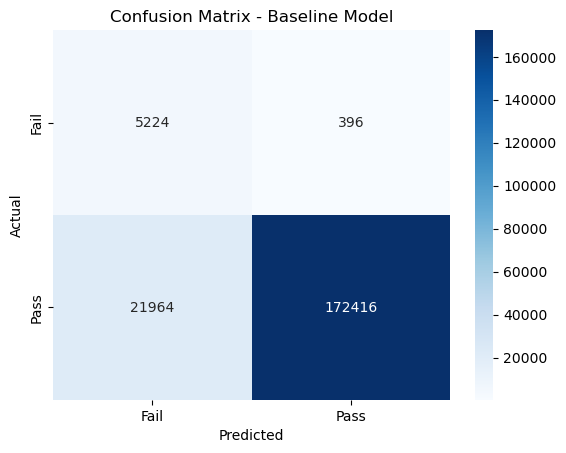

In [16]:
# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail','Pass'], yticklabels=['Fail','Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Baseline Model')
plt.show()


Overall accuracy = 0.89 (89%)

Recall is high → 93% of students who actually fail were correctly identified. Precision is low → only 19% of predicted fails were actually failing. Failing students are rare, so the model sometimes mislabels passing students as failing.

Precision is perfect → almost all predicted passes are correct. Recall = 89% → 11% of passing students were incorrectly predicted as failing.

The model is very good at catching students at risk of failing (high recall for class 0)

2. Tuned Model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Tuned logistic regression
tuned_model = LogisticRegression(
    class_weight='balanced',  # handle class imbalance
    C=0.5,                    # regularization strength tuned
    solver='saga',            # good for large datasets
    max_iter=500,             # ensure convergence
    random_state=42
)

# Fit on scaled training data
tuned_model.fit(X_train_scaled, y_train)

# Predict on test data
y_tuned_pred = tuned_model.predict(X_test_scaled)


              precision    recall  f1-score   support

           0       0.19      0.93      0.32      5620
           1       1.00      0.89      0.94    194380

    accuracy                           0.89    200000
   macro avg       0.60      0.91      0.63    200000
weighted avg       0.98      0.89      0.92    200000



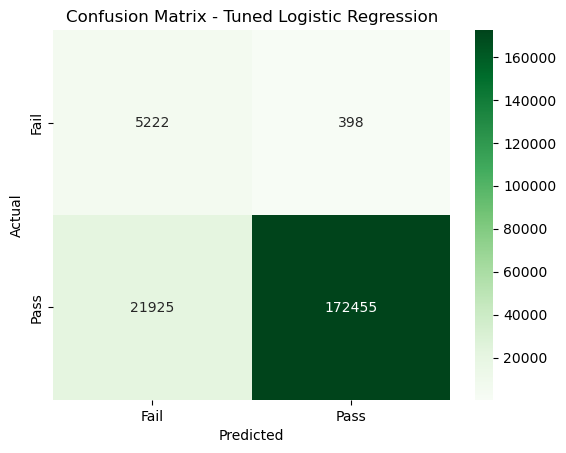

In [18]:
# Classification report
print(classification_report(y_test, y_tuned_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_tuned_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Fail','Pass'], yticklabels=['Fail','Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Logistic Regression')
plt.show()


Accuracy: 89%

For failing students:

_Recall = 0.93_
- The model correctly identifies 93% of students who actually fail. Important for early intervention because very few failing students are missed.

_Precision = 0.19_
- Only 19% of students predicted to fail actually fail. This means the model over-flags some students as at risk.

_F1-score = 0.32_
- Indicates moderate performance due to the trade-off between high recall and low precision.

For Passing students:

_Precision = 1.00_
-  Almost every student predicted to pass actually passes.

_Recall = 0.89_
- The model correctly identifies 89% of students who pass.

_F1-score = 0.94_
- Very strong performance for the majority class

#### 3.2.4 Feature Importance

In [19]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': baseline_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance


,Feature,Coefficient
0,weekly_self_study_hours,3.814315
1,attendance_percentage,0.009289
2,class_participation,0.003735


Weekly self-study hours (Coefficient = 3.81) - A higher number of weekly self-study hours greatly increases a student’s probability of passing

Attendance percentage (Coefficient = 0.009) - Students who attend classes more regularly are slightly more likely to pass

Class participation (Coefficient = 0.004) - Actively engaging in class discussions and activities provides additional support to overall performance but is less impactful than study time and attendance.